# ARIMAモデル系

　ARMAモデル系では対象の時系列データを定常なものに近づけてからモデリングする必要があったが, ARIMAモデルでは非定常な時系列データに対して適応できる.

- 自己回帰和分移動平均モデル ${\rm ARIMA}(p, d, q)$
    - 時系列データが $d$ 次の階差を取ることで定常性データと見なすことができそうな場合.
- 季節性自己回帰和分移動平均モデル ${\rm SARIMA}(p, d, q) \times (P, D, Q, s)$
    - 時系列データが $d$ 次の階差を取ることに加え, 季節要因の基本周期分の階差を取って季節要因を除去し, 定常性データと見なすことができそうな場合.

## 1. ARIMAモデル / SARIMAモデル

### 1.1 定義 (${\rm ARIMA}(p, d, q)$モデル)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　時系列 $\{ y_t \}$ について $t = 1, 2, \cdots, T $ のとき $d$ 次の[階差](tsa:time_series:preprocess:difference)をとった時系列 $\{ z_t \}$, つまり
    
$$
    \begin{align}
        z_n = \nabla^d y_n
    \end{align}
$$
    
に対して以下のモデル式で定義されたものを**自己回帰和分移動平均モデル** (autoregressive integrated moving average model, ARIMA model) という.

$$
    z_t = c + \sum_{i=1}^{p} {\phi_{i} z_{t-i}} + \varepsilon_t + \sum_{i=1}^{q} {\theta_{i} \varepsilon_{t-i}} \quad s.t. \ c \in \mathbb{R}, \ p, q \in \mathbb{N}, \ \varepsilon_t \sim \text{WN}(0, \sigma_{\varepsilon}^2)
$$

このとき **$\text{ARIMA}(p, d, q)$** と表す.

</div>

　モデルの意味として, (1) $\{y_t\}$ に対して $d$ 次の階差をとり, (2) ${\rm ARMA}(p,q)$ モデルを構築しているだけに過ぎない. ゆえに, 時系列データ $\{y_t\}$ が $d$ 次の階差を取ることで定常性を持つと考えられるようなデータであれば, 非定常な時系列データでもモデリングができる.  
　経験則ではあるが, 複数回の階差を取るとほとんどの時系列データは定常なデータと見なして問題ない.

ここでラグ多項式 $\phi_p(L), \theta_q(L)$ 

$$
    \begin{align}
        \phi_p(L) &= 1 - (\phi_1 L^{1} + \cdots + \phi_p L^{p}) = 1 - \sum_{i=1}^{p}{\phi_i L^{i}} \\
        \theta_q(L) &= 1 + (\theta_1 L^{1} + \cdots + \theta_q L^{q}) = 1 - \sum_{i=1}^{q}{\theta_i L^{i}}
    \end{align}
$$

および $\nabla = 1 - L$ ([ラグ演算子と差分作用子の関係](tsa:arma:lag-operator:difference-relations)) を用いて

$$
    (1-L)^d \phi_p(L)y_t = c + \theta_q(L) \varepsilon_t
$$

とも表現できる.

### 1.2 定義 (${\rm SARIMA}(p, d, q) \times (P, D, Q, s)$モデル)

<div style="padding: 10px; margin-bottom: 10px; border: 1px solid #333333; border-radius: 10px;">

　時系列 $\{ y_t \}$ について $t = 1, 2, \cdots, T $ で, 季節要因の基本周期 $s$ としたときに以下のモデル式で表現できるとき**季節性自己回帰和分移動平均モデル** (seasonal autoregressive integrated moving average model, SARIMA model) という.
    
$$
    \Phi(L) (1-L)^d (1-L^s)^D y_t = c + \Theta(L)\varepsilon_t \quad s.t. \ c \in \mathbb{R}, \ d, D, s \in \mathbb{N}, \ \varepsilon_t \sim \text{WN}(0, \sigma_{\varepsilon}^2)
$$

ただし,

$$
    \begin{align}
        & \Phi(L) 
            = \phi_p(L) \tilde{\phi}_P(L^s) 
            = \biggl( 1 - \sum_{i=1}^{p}{\phi_i L^{i}} \biggr) \biggl( 1 - \sum_{i=1}^{P}{\tilde{\phi}_i L^{si}} \biggr) 
            \quad &s.t. \ \phi_i, \tilde{\phi}_i \in \mathbb{R}, \ p, P \in \mathbb{N} \\
        & \Theta(L) 
            = \theta_q(L) \tilde{\theta}_Q(L^s) 
            = \biggl( 1 + \sum_{i=1}^{q}{\theta_i L^{i}} \biggr) \biggl( 1 + \sum_{i=1}^{Q}{\tilde{\theta}_i L^{si}} \biggr)
            \quad &s.t. \ \theta_i, \tilde{\theta}_i \in \mathbb{R}, \ q, Q \in \mathbb{N}
    \end{align}
$$
    
とする. このとき **$\text{SARIMA}(p, d, q)\times(P, D, Q, s)$** と表す.

</div>

　モデルのイメージとしては $\phi_p(L), \theta_q(L)$ が通常の $d$ 次階差部分の AR 成分, MA 成分を表現し, $\tilde{\phi}_P(L^s), \tilde{\theta}_Q(L^s)$ が基本周期 $s$ の $D$ 次階差部分の AR 成分, MA 成分を表現している. ${\rm ARIMA}(p, d ,q) = {\rm SARIMA}(p, d, q)\times (0, 0, 0, 0)$ である.



### 1.3 例 (statsmodels による ARIMA / SARIMA モデル)

　[`statsmodels`](https://www.statsmodels.org/stable/index.html) において ARIMA(X) / SARIMAX(X) を構築するクラスモジュールが2つ存在する.

- [`statsmodels.tsa.arima.model.ARIMA`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)
- [`statsmodels.tsa.statespace.sarimax.SARIMAX`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html)

トレンド項の入り方が微妙に異なっているので推定結果がいつでも一致するとは限らないので, その点を意識して使い分けをする必要がある.

<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        statsmodels.tsa.arima.model.ARIMA による SARIMAX
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 20px;">

　 時系列 $\{ y_t \}$ について $t = 1, 2, \cdots, T $ について, トレンド項を $A(t) = a_0 + a_1 t + \cdots + a_l = \displaystyle \sum_{i=0}^{l}{a_i x_i}$, 回帰成分が $j$ 個存在し時点 $t$ での値を $x_t = [x_{t1} \ x_{t2} \ \cdots \ x_{tj}]$ とし, 回帰係数を $\beta = [\beta_{1} \ \beta_{2} \ \cdots \ \beta_{j}]'$ とする. このとき [`statsmodels.tsa.arima.model.ARIMA`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html) で表現できる ${\rm SARIMA}(p, d, q) \times (P, D, Q, s)$ は以下となる.
    
$$
    \Phi(L) (1-L)^d (1-L^s)^D (y_t - A(t) - \beta x_t) = \Theta(L)\varepsilon_t \quad s.t. \ \varepsilon_t \sim \text{WN}(0, \sigma_{\varepsilon}^2)
$$
    
</div>

<br>

(tsa:arima:arima-sarima:statsmodels:sarimax)=
<div style="background: rgb(0, 0, 0); border: 1px solid rgb(0, 0, 0); padding-left: 20px;">
    <span style="color: white; font-size: 100%;">
        statsmodels.tsa.statespace.sarimax.SARIMAX による SARIMAX
    </span>
</div>
<div style="border: rgb(0, 0, 0) solid 1px; font-size: 100%; padding: 20px;">

　 [`statsmodels.tsa.statespace.sarimax.SARIMAX`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html) で表現できる ${\rm SARIMA}(p, d, q) \times (P, D, Q, s)$ は以下となる.
    
$$
    \Phi(L) (1-L)^d (1-L^s)^D (y_t - \beta x_t) = A(t) + \Theta(L)\varepsilon_t \quad s.t. \ \varepsilon_t \sim \text{WN}(0, \sigma_{\varepsilon}^2)
$$
    
</div>

　前述した通りラグ多項式 $\Phi(L), \Theta(L)$ は
 
$$
    \begin{align}
        & \Phi(L) 
            = \phi_p(L) \tilde{\phi}_P(L^s) 
            = \biggl( 1 - \sum_{i=1}^{p}{\phi_i L^{i}} \biggr) \biggl( 1 - \sum_{i=1}^{P}{\tilde{\phi}_i L^{si}} \biggr) \\
        & \Theta(L) 
            = \theta_q(L) \tilde{\theta}_Q(L^s) 
            = \biggl( 1 + \sum_{i=1}^{q}{\theta_i L^{i}} \biggr) \biggl( 1 + \sum_{i=1}^{Q}{\tilde{\theta}_i L^{si}} \biggr)
    \end{align}
$$

である.

#### 関連モジュール説明

##### [statsmodels.tsa.arima.model.ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)

- `class statsmodels.tsa.arima.model.ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)`
- トレンド項をAR成分に入れ込んだSARIMAXモデルを構築.

| Parameters | Data type | Explanation |
| ---------- | --------- | ----------- |
| `endog` | [`array_like`](https://numpy.org/doc/stable/glossary.html#term-array_like) |観測値 ($y_t$) |
| `exog` | [`array_like`](https://numpy.org/doc/stable/glossary.html#term-array_like) | 説明変数 ($x_t$) |
| `order` | [`tuple`](https://docs.python.org/3/library/stdtypes.html#tuple) | $(p, d, q)$ の設定 |
| `seasonal_order` | [`tuple`](https://docs.python.org/3/library/stdtypes.html#tuple) | $(P, D, Q, s)$ の設定 |
| `trend` | [`str`](https://docs.python.org/3/library/stdtypes.html#str){"n", "c", "t", "ct"} or [`iterable`](https://docs.python.org/3/glossary.html#term-iterable) | トレンド項の多項式を指定する. 文字列の場合, <br> - `n` : $A(t) = 0$ <br> - `c` : $A(t) = a_0$ <br> - `t` : $A(t) = a_1 t $ <br> - `ct` : $A(t) = a_0 + a_1 t$ <br> また, 1次元の数値のシーケンスでリストの場合, $[a_0, a_1, \cdots, a_l]$ を示し, 例えば `[1, 1, 0, 1]` のとき $A(t) = a_0 + a_1 t + a_3 t^3$ となる. |
| `enforce_stationarity` | [`bool`](https://docs.python.org/3/library/stdtypes.html#bltin-boolean-values) | 自己回帰係数に対して[定常性条件](tsa:arma:ar-model:stationarity)を満たすように推定 ( $\|$$\phi_i $$\|$ $ < 1$, $\|$$\tilde{\phi}_i $$\|$ $ < 1$ ) |
| `enforce_invertibility` | [`bool`](https://docs.python.org/3/library/stdtypes.html#bltin-boolean-values) | 移動平均係数に対して[反転可能性](tsa:arma:ma-model:stationarity)を満たすように推定 ( $\|$$\theta_i $$\|$ $ < 1$, $\|$$\tilde{\theta}_i $$\|$ $ < 1$ )|
| `concentrate_scale` | [`bool`](https://docs.python.org/3/library/stdtypes.html#bltin-boolean-values) | 尤度関数に対して誤差項の分散を集約して最尤推定するかどうか. |
| `trend_offset` | [`int`](https://docs.python.org/3/library/functions.html#int) | トレンド項の $t$ のオフセット値. デフォルトは1で, `trend_offset` $=\tau$ とすれば $ \{\tau, \tau+1, \cdots, t + \tau -1, \cdots \}$. |
| `date` | [`array_like`](https://numpy.org/doc/stable/glossary.html#term-array_like) of [`datetime`](https://docs.python.org/3/library/datetime.html#module-datetime) | 設定した場合に `endog`, `exog` のindexに設定する |
| `freq` | [`str`](https://docs.python.org/3/library/stdtypes.html#str) | 設定した場合に `endog`, `exog` のindexの時間 freq に設定 |

##### [statsmodels.tsa.arima.model.ARIMA.fit](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.fit.html)

- `ARIMA.fit(start_params=None, transformed=True, includes_fixed=False, method=None, method_kwargs=None, gls=None, gls_kwargs=None, cov_type=None, cov_kwds=None, return_params=False, low_memory=False)`
- `ARIMA` クラスのパラメータ推定メソッド.

| Parameters | Data type | Explanation |
| ---------- | --------- | ----------- |
| `start_params` | [`array_like`](https://numpy.org/doc/stable/glossary.html#term-array_like) | 最尤推定の際の初期値. |

##### [statsmodels.tsa.arima.model.ARIMAResults](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.html)

- `class statsmodels.tsa.arima.model.ARIMAResults(model, params, filter_results, cov_type=None, **kwargs)`
- `ARIMA.fit` の結果クラス.

##### [statsmodels.tsa.arima.model.ARIMAResults.get_prediction](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMAResults.get_prediction.html)

- `ARIMAResults.get_prediction(start=None, end=None, dynamic=False, index=None, exog=None, extend_model=None, extend_kwargs=None, **kwargs)`
- `ARIMAResults` クラスを通じて in-sample prediction (学習データ時系列内の予測), out-of-forecasting (学習データ時系列外の予測) に関する `PredictionResults` インスタンスを返す.

| Parameters | Data type | Explanation |
| ---------- | --------- | ----------- |
| `start` | [`int`](https://docs.python.org/3/library/functions.html#int), [`str`](https://docs.python.org/3/library/stdtypes.html#str), or [`datetime`](https://docs.python.org/3/library/datetime.html#module-datetime) | 予測開始時点の index 番号, または日付 |
| `end` | [`int`](https://docs.python.org/3/library/functions.html#int), [`str`](https://docs.python.org/3/library/stdtypes.html#str), or [`datetime`](https://docs.python.org/3/library/datetime.html#module-datetime) | 予測終了時点の index 番号, または日付 |


##### [statsmodels.tsa.statespace.sarimax.SARIMAX](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html)

- トレンド項を AR 成分, MA 成分とは独立して定義した SARIMAX モデルを構築.
- `class statsmodels.tsa.statespace.sarimax.SARIMAX(endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', validate_specification=True, **kwargs)`
- 引数の説明は `statsmodels.tsa.arima.model.ARIMA` と重複している内容は同内容.

| Parameters | Data type | Explanation |
| ---------- | --------- | ----------- |
| `measurement_error` | [`bool`](https://docs.python.org/3/library/stdtypes.html#bltin-boolean-values) | [モデル左辺](tsa:arima:arima-sarima:statsmodels:sarimax)において, $y_t - \beta x_t - \varepsilon$ のように $\varepsilon$ を入れるかどうかを指定 |
| `time_varying_regression` | [`bool`](https://docs.python.org/3/library/stdtypes.html#bltin-boolean-values) | 回帰係数を時変するかどうか |
| `mle_regression` | [`bool`](https://docs.python.org/3/library/stdtypes.html#bltin-boolean-values) | `True` の場合は回帰係数の推定に最尤推定で行い, `False` の場合はカルマンフィルターによる逐次推定を実施する. `time_varying_regression = True` の時はカルマンフィルターによって時変の回帰係数を推定することとなるので `True` にする必要がある. |
| `simple_differencing` | [`bool`](https://docs.python.org/3/library/stdtypes.html#bltin-boolean-values) | XXXXX |
| `hamilton_representation` | [`bool`](https://docs.python.org/3/library/stdtypes.html#bltin-boolean-values) | XXXXX |
| `use_exact_diffuse` | [`bool`](https://docs.python.org/3/library/stdtypes.html#bltin-boolean-values) | XXXXX |


##### [statsmodels.tsa.statespace.sarimax.SARIMAX.fit](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.fit.html)

- `SARIMAX.fit(start_params=None, transformed=True, includes_fixed=False, cov_type=None, cov_kwds=None, method='lbfgs', maxiter=50, full_output=1, disp=5, callback=None, return_params=False, optim_score=None, optim_complex_step=None, optim_hessian=None, flags=None, low_memory=False, **kwargs)`
- `SARIMAX` クラスのパラメータ推定メソッド.


##### [statsmodels.tsa.statespace.sarimax.SARIMAXResults](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.html)

- `class statsmodels.tsa.statespace.sarimax.SARIMAXResults(model, params, filter_results, cov_type=None, **kwargs)`
- `SARIMAX.fit` の結果クラス.

##### [statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_prediction](https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_prediction.html)

- `SARIMAXResults.get_prediction(start=None, end=None, dynamic=False, index=None, exog=None, extend_model=None, extend_kwargs=None, **kwargs)`
- `SARIMAXResults` クラスを通じて in-sample prediction (学習データ時系列内の予測), out-of-forecasting (学習データ時系列外の予測) に関する `PredictionResults` インスタンスを返す.

#### 具体例

In [1]:
import warnings

# 必要ライブラリを一括してインポートし図示の設定を実行.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.special import boxcox, inv_boxcox

# scikit-learn でMAPE算出モジュールとデータを訓練用とテスト用に分割するモジュールを import
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# analytics-sandbox にあるテストデータをインポート.
from sandbox.datasets import air_passengers

# 見た目のために warnings を強制的に非表示.
warnings.filterwarnings("ignore")

# プロット時の設定.
sns.set()
pd.plotting.register_matplotlib_converters()
sns.mpl.rc("font", size=14)

/Users/yuta.sonoda/opt/anaconda3/envs/analytics-sandbox/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


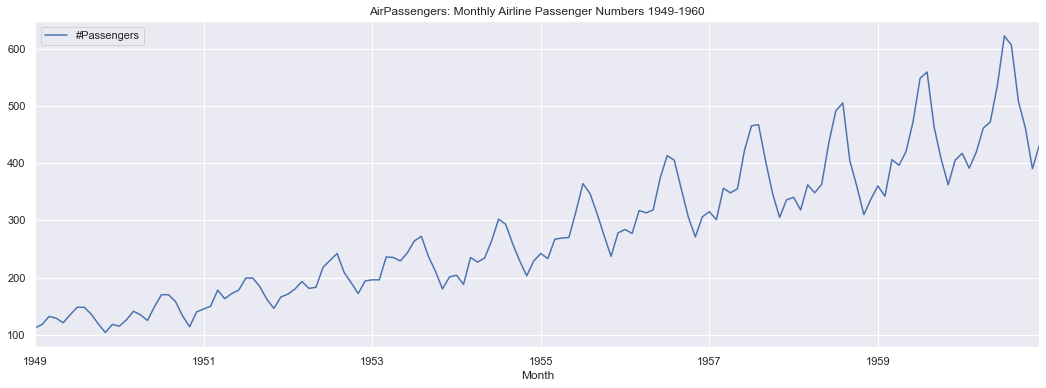

In [2]:
# データの読み込み
psgr = air_passengers.load().data

fig, ax = plt.subplots(figsize=(18, 6))
psgr.plot(ax=ax, title=f"{air_passengers.TITLE}")
plt.show()

In [3]:
# テストデータを 20% ととしてデータを分割する.
# ただし, 時系列データのためデータ順序がシャッフルされないように設定する.
test_size = 0.20
shuffle = False
psgr_train, psgr_test = train_test_split(psgr, test_size=test_size, shuffle=shuffle)

In [4]:
endog = psgr_train
order = (12, 1, 1)

model_arima = ARIMA(endog, order=order)

In [5]:
def update_and_fit(model, fit_count=10, start_params=None, print_progress=True):
    model_result = None
    for i in range(fit_count):
        try:
            model_result_temp = model.fit(start_params=start_params)
            start_params = list(tuple(model_result_temp.params))
            model_result = model_result_temp

            if print_progress:
                log_msg = f"ARIMA {i+1}-th fitting:\r\n{model_result.params}"
                print(log_msg)

        except:
            error_msg = f"From start_params={start_params}, fit cannnot be executed, and before-one-step result returns"
            print(error_msg)
            break

    return model_result

In [6]:
model_result_arima = update_and_fit(model_arima, print_progress=False)
model_result_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                ARIMA(12, 1, 1)   Log Likelihood                -424.140
Date:                Sun, 21 Aug 2022   AIC                            876.280
Time:                        01:20:18   BIC                            914.586
Sample:                    01-01-1949   HQIC                           891.826
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0893      0.088      1.012      0.312      -0.084       0.262
ar.L2         -0.0933      0.066     -1.404      0.160      -0.224       0.037
ar.L3          0.0507      0.056      0.900      0.368      -0.060       0.161
ar.L4         -0.0926      0.059     -1.581      0.114      -0.207       0.022
ar.L5          0.0626      0.062      1.017      0.309      -0.058       0.183
ar.L6         -0.0818      0.056     -1.468      0.142      -0.191       0.027
ar.L7          0.0145      0.067      0.216      0.829      -0.117       0.146
ar.L8         -0.1172      0.060     -1.957      0.050      -0.235       0.000
ar.L9          0.0424      0.068      0.626      0.531      -0.090       0.175
ar.L10        -0.1222      0.058     -2.116      0.034      -0.235      -0.009
ar.L11         0.0896      0.066      1.354      0.176      -0.040       0.219
ar.L12         0.8149      0.063     12.869      0.000       0.691       0.939
ma.L1         -0.2481      0.142     -1.748      0.080      -0.526       0.030
sigma2        81.5693     12.651      6.447      0.000      56.773     106.366
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.93
Prob(Q):                              0.73   Prob(JB):                         0.23
Heteroskedasticity (H):               1.85   Skew:                             0.39
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
def predict(model_result, test_data, alpha=None):
    """予測値データフレームを返す.
    引数の test_data をもとに予測期間を決め, 予測値・信頼区間を返す.
    
    Parameters
    ----------
    model_result : 
        statsmodels の fit() 結果インスタンス.
    test_data : pandas.core.Dataframe
        検証データ.
    alpha : float, default None
        信頼区間の確率.
        
    Return
    ------
    df_predict : pandas.core.DataFrame
        予測データフレーム.
    mape : float
        MAPE.
    
    """
    # 予測期間を検証データから取得.
    start, end = test_data.index.min(), test_data.index.max()

    # 予測結果インスタンスを取得.
    predict_result = model_result.get_prediction(start=start, end=end)

    # 予測値データフレームを作成 (検証値, 予測値).
    df_predict = test_data.copy().join(predict_result.predicted_mean)

    # 信頼区間の alpha を設定した場合にはデータフレームに信頼区間を追加.
    if alpha:
        df_predict_ci = predict_result.conf_int(alpha=alpha)
        df_predict = df_predict.join(df_predict_ci)

    # scikit-learn のモジュールを用いて MAPE を計算.
    mape = mean_absolute_percentage_error(test_data, predict_result.predicted_mean)

    return df_predict, mape


def plot(predictvalue: pd.Series):
    """予測値をプロット."""
    fig, ax = plt.subplots(figsize=(18, 6))
    plt.plot(psgr_train, marker="o", label="Train")
    plt.plot(psgr_test, marker="o", label="Test")
    plt.plot(
        predictvalue, marker="o", label=f"Predict",
    )
    plt.legend()
    plt.show()

In [8]:
df_predict_arima, mape_arima = predict(model_result_arima, psgr_test, alpha=0.05)
mape_arima_msg = f"MAPE: {round(mape_arima, 3)}"
print(mape_arima_msg)

MAPE: 0.082


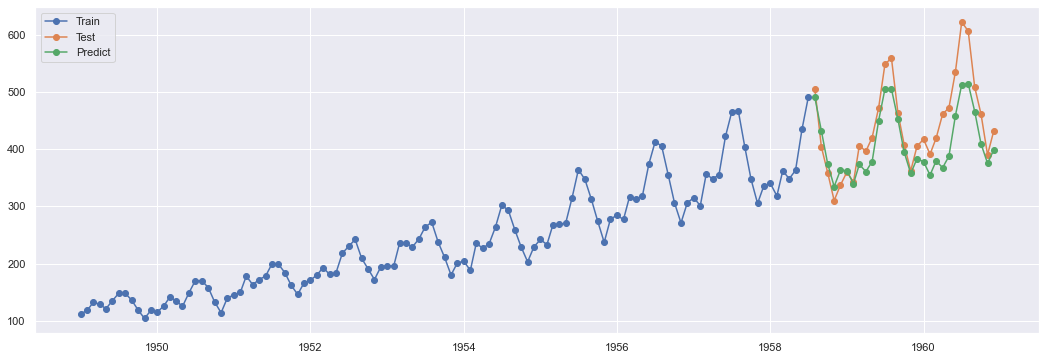

In [9]:
plot(df_predict_arima["predicted_mean"])

In [10]:
def arima_order_select_ic(
    endog,
    exog=None,
    max_order=(0, 0, 0),
    ic="bic",
    print_progress=True,
    ignore_warning=True,
):
    import warnings

    if ignore_warning:
        warnings.filterwarnings("ignore")
    else:
        warnings.filterwarnings("default")

    p, d, q = (
        range(0, max_order[0] + 1),
        range(0, max_order[1] + 1),
        range(0, max_order[2] + 1),
    )

    import itertools

    order_list = list(itertools.product(p, d, q))

    best_model = None
    best_ic = None
    for order in order_list:
        try:
            model = ARIMA(endog=endog, exog=exog, order=order)
            model_result = model.fit()

            if ic == "aic":
                now_ic = model_result.aic
            elif ic == "bic":
                now_ic = model_result.bic
            elif ic == "aicc":
                now_ic = model_result.aicc
            elif ic == "hqic":
                now_ic = model_result.hqic
            else:
                msg = f"Specified ic must be {'aic', 'bic', 'aicc', 'hqic'}, not {ic}"
                raise ValueError(msg)

            print_msg = f"order{order} - {ic}: {round(now_ic, 5)}"
            if best_ic is None or best_ic > now_ic:
                # stationarity and inversibility check.
                ar_less_than_one = (
                    abs(model_result.arparams).max() < 1 if order[0] > 0 else True
                )
                ma_less_than_one = (
                    abs(model_result.maparams).max() < 1 if order[2] > 0 else True
                )
                if ar_less_than_one * ma_less_than_one:
                    best_model = model
                    best_ic = now_ic
                    print_msg += " [UPDATE]"
                elif not ar_less_than_one:
                    non_ar_msg = "Non-stationary autoregressive parameters found, "
                    print_msg += f" [NOT UPDATE] {non_ar_msg}"
                elif not ma_less_than_one:
                    non_ma_msg = "Non-invertible moving average parameters found."
                    print_msg += f" [NOT UPDATE] {non_ma_msg}"
            else:
                print_msg += " [NOT UPDATE] Non-better information criteria"

            if print_progress:
                print(print_msg)

        except:
            error_msg = (
                f"***ARIMA{order} cannot be estimated and {order} has been skipped.***"
            )
            print(error_msg)
            continue

    print(f"Decide ARIMA{best_model.order} - {ic}: {round(now_ic, 5)}")

    return best_model, best_ic

In [11]:
# グリッドサーチで最適モデルを選定しているのでやや時間がかかる.
max_order = (13, 2, 1)
best_model, best_ic = arima_order_select_ic(
    endog, max_order=max_order, print_progress=False, ignore_warning=True
)

Decide ARIMA(11, 2, 1) - bic: 911.69635


In [12]:
def update_and_fit(model, fit_count=10, start_params=None, print_progress=True):
    model_result = None
    for i in range(fit_count):
        try:
            model_result_temp = model.fit(start_params=start_params)
            start_params = list(tuple(model_result_temp.params))
            model_result = model_result_temp

            if print_progress:
                log_msg = f"ARIMA {i+1}-th fitting:\r\n{model_result.params}"
                print(log_msg)

        except:
            error_msg = f"From start_params={start_params}, fit cannnot be executed, and before-one-step result returns"
            print(error_msg)
            break

    return model_result

In [13]:
best_model_result = update_and_fit(best_model, print_progress=False)
best_model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  115
Model:                ARIMA(11, 2, 1)   Log Likelihood                -422.761
Date:                Sun, 21 Aug 2022   AIC                            871.521
Time:                        01:20:35   BIC                            906.977
Sample:                    01-01-1949   HQIC                           885.909
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8765      0.077    -11.405      0.000      -1.027      -0.726
ar.L2         -0.9434      0.051    -18.658      0.000      -1.042      -0.844
ar.L3         -0.8619      0.072    -11.961      0.000      -1.003      -0.721
ar.L4         -0.9285      0.052    -17.766      0.000      -1.031      -0.826
ar.L5         -0.8350      0.070    -11.911      0.000      -0.972      -0.698
ar.L6         -0.8913      0.051    -17.413      0.000      -0.992      -0.791
ar.L7         -0.8481      0.064    -13.151      0.000      -0.974      -0.722
ar.L8         -0.9388      0.053    -17.788      0.000      -1.042      -0.835
ar.L9         -0.8655      0.055    -15.748      0.000      -0.973      -0.758
ar.L10        -0.9611      0.041    -23.304      0.000      -1.042      -0.880
ar.L11        -0.8403      0.064    -13.083      0.000      -0.966      -0.714
ma.L1         -0.2651      0.131     -2.030      0.042      -0.521      -0.009
sigma2        83.1683     12.922      6.436      0.000      57.842     108.495
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.79
Prob(Q):                              0.84   Prob(JB):                         0.25
Heteroskedasticity (H):               1.88   Skew:                             0.38
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
df_predict_best_arima, mape_best_arima = predict(
    best_model_result, psgr_test, alpha=0.05
)
mape_best_arima_msg = f"MAPE: {round(mape_best_arima, 3)}"
print(mape_best_arima_msg)

MAPE: 0.06


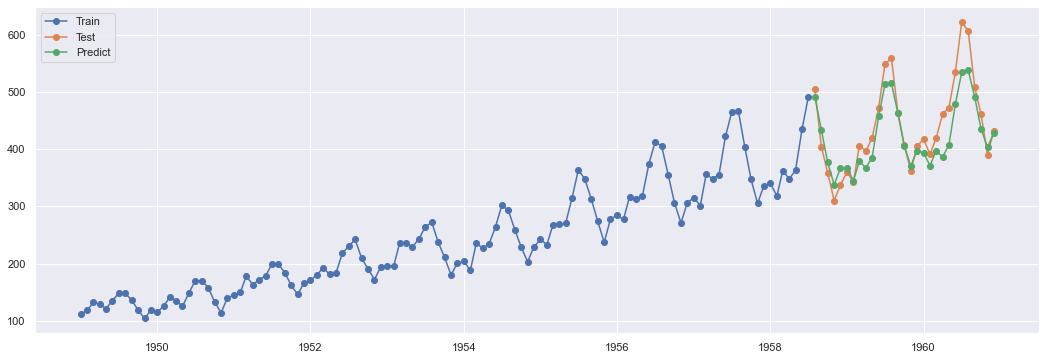

In [15]:
plot(df_predict_best_arima["predicted_mean"])

In [16]:
endog = psgr_train
order = (1, 1, 3)
seasonal_order = (1, 1, 1, 12)

model_sarima = ARIMA(endog, order=order, seasonal_order=seasonal_order)

model_result_sarima = update_and_fit(model_sarima, print_progress=False)
model_result_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  115
Model:             ARIMA(1, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -370.977
Date:                            Sun, 21 Aug 2022   AIC                            755.955
Time:                                    01:20:36   BIC                            774.330
Sample:                                01-01-1949   HQIC                           763.395
                                     - 07-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6127      0.182      3.372      0.001       0.257       0.969
ma.L1         -0.7865      0.197     -3.994      0.000      -1.173      -0.401
ma.L2          0.1827      0.151      1.209      0.227      -0.113       0.479
ma.L3         -0.3034      0.127     -2.397      0.017      -0.552      -0.055
ar.S.L12      -0.0903      0.653     -0.138      0.890      -1.371       1.190
ma.S.L12      -0.0684      0.674     -0.102      0.919      -1.389       1.252
sigma2        83.4408     12.743      6.548      0.000      58.465     108.417
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.79   Prob(JB):                         0.47
Heteroskedasticity (H):               1.06   Skew:                             0.29
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
df_predict_sarima, mape_sarima = predict(model_result_sarima, psgr_test, alpha=0.05)
mape_sarima_msg = f"MAPE: {round(mape_sarima, 3)}"
print(mape_sarima_msg)

MAPE: 0.043


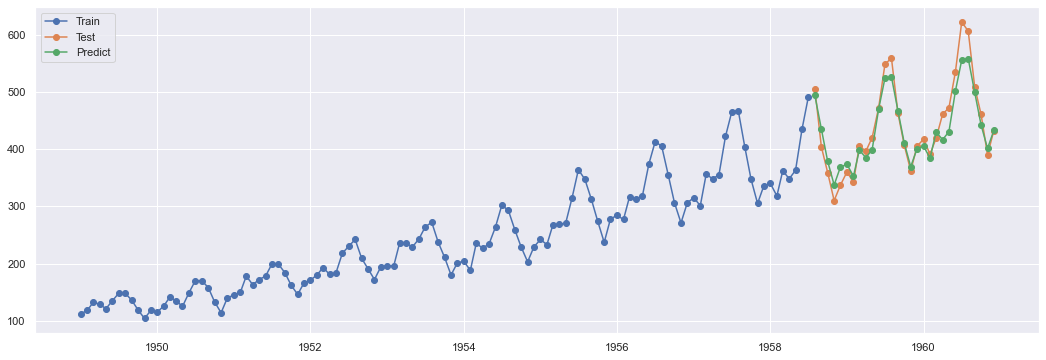

In [18]:
plot(df_predict_sarima["predicted_mean"])

In [19]:
def sarima_order_select_ic(
    endog,
    exog=None,
    max_order=(0, 0, 0),
    max_seasonal_order=(0, 0, 0),
    seasonal=0,
    ic="bic",
    print_progress=True,
    ignore_warning=True,
):
    import warnings

    if ignore_warning:
        warnings.filterwarnings("ignore")
    else:
        warnings.filterwarnings("default")

    p, d, q = (
        range(0, max_order[0] + 1),
        range(0, max_order[1] + 1),
        range(0, max_order[2] + 1),
    )

    # Not set seasonal basic cycle -> not define any seasonal effect.
    # (P, D, Q, s) = (0, 0, 0, 0)
    # If you set seasonal basic cycle, minimum order of difference in seasonality is one.
    if seasonal == 0:
        P, D, Q = (range(0, 1), range(0, 1), range(0, 1))
    else:
        P, D, Q = (
            range(0, max_seasonal_order[0] + 1),
            range(1, max_seasonal_order[1] + 1),
            range(0, max_seasonal_order[2] + 1),
        )

    import itertools

    order_list = list(itertools.product(p, d, q))
    seasonal_order_list = list(itertools.product(P, D, Q))

    best_model = None
    best_ic = None
    for order in order_list:
        for seasonal_order in seasonal_order_list:
            seasonal_order += tuple([seasonal])
            try:
                model = ARIMA(
                    endog=endog, exog=exog, order=order, seasonal_order=seasonal_order
                )
                model_result = model.fit()

                if ic == "aic":
                    now_ic = model_result.aic
                elif ic == "bic":
                    now_ic = model_result.bic
                elif ic == "aicc":
                    now_ic = model_result.aicc
                elif ic == "hqic":
                    now_ic = model_result.hqic
                else:
                    msg = (
                        f"Specified ic must be {'aic', 'bic', 'aicc', 'hqic'}, not {ic}"
                    )
                    raise ValueError(msg)

                # define progress message
                print_msg = (
                    f"SARIMAX{order}X{seasonal_order} - {ic}: {round(now_ic, 5)}"
                )

                if _whether_be_better_in_ic(now_ic, best_ic):

                    # stationarity and inversibility check.
                    if not _is_stationary_in_ar(model_result.arparams):
                        non_ar_msg = "Non-stationary autoregressive parameters found, "
                        print_msg += f" [NOT UPDATE] {non_ar_msg}"

                    elif not _is_inversible_in_ma(model_result.maparams):
                        non_ma_msg = "Non-invertible moving average parameters found."
                        print_msg += f" [NOT UPDATE] {non_ma_msg}"

                    elif not _is_stationary_in_ar(model_result.seasonalarparams):
                        non_seasonalar_msg = (
                            "Non-stationary seasonal autoregressive parameters found, "
                        )
                        print_msg += f" [NOT UPDATE] {non_seasonalar_msg}"

                    elif not _is_inversible_in_ma(model_result.seasonalmaparams):
                        non_seasonalma_msg = (
                            "Non-stationary seasonal moving average parameters found, "
                        )
                        print_msg += f" [NOT UPDATE] {non_seasonalma_msg}"

                    else:
                        best_model = model
                        best_ic = now_ic
                        print_msg += " [UPDATE]"

                else:
                    print_msg += " [NOT UPDATE] Non-better information criteria"

                if print_progress:
                    print(print_msg)

            except:
                error_msg = f"***SARIMAX{order}X{seasonal_order} cannot be estimated and {order}X{seasonal_order} has been skipped.***"
                print(error_msg)
                continue

    if best_model is None:
        print(f"Not decide SARIMAX")
    else:
        print(
            f"Decide SARIMAX{best_model.order}X{best_model.seasonal_order} - {ic}: {round(now_ic, 5)}"
        )

    return best_model, best_ic


def _whether_be_better_in_ic(now_ic, best_ic=None):
    if best_ic is None:
        return True
    else:
        return best_ic > now_ic


def _is_stationary_in_ar(ar_params):
    """ """
    # calculate the order or ar.
    if ar_params is None or len(ar_params) == 0:
        order = 0
    else:
        order = len(ar_params)

    # check stationarity.
    ar_less_than_one = abs(ar_params).max() < 1 if order > 0 else True
    return ar_less_than_one


def _is_inversible_in_ma(ma_params):
    """ """
    # calculate the order or ma.
    if ma_params is None or len(ma_params) == 0:
        order = 0
    else:
        order = len(ma_params)

    # check inversibility.
    ma_less_than_one = abs(ma_params).max() < 1 if order > 0 else True
    return ma_less_than_one

In [20]:
# グリッドサーチのためやや時間がかかる.
max_order = (2, 2, 2)
max_seasonal_order = (1, 1, 1)

best_model, best_ic = sarima_order_select_ic(
    endog,
    max_order=max_order,
    max_seasonal_order=max_seasonal_order,
    seasonal=12,
    print_progress=False,
    ignore_warning=True,
)

Decide SARIMAX(0, 1, 0)X(0, 1, 0, 12) - bic: 779.03066


In [21]:
best_model_result_sarima = update_and_fit(best_model, print_progress=False)
best_model_result_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                      #Passengers   No. Observations:                  115
Model:             ARIMA(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -377.913
Date:                          Sun, 21 Aug 2022   AIC                            757.826
Time:                                  01:20:57   BIC                            760.451
Sample:                              01-01-1949   HQIC                           758.889
                                   - 07-01-1958                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        96.7569     13.829      6.997      0.000      69.652     123.861
===================================================================================
Ljung-Box (L1) (Q):                   4.33   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.04   Prob(JB):                         0.42
Heteroskedasticity (H):               0.80   Skew:                             0.31
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
df_predict_best_sarima, mape_best_sarima = predict(
    best_model_result_sarima, psgr_test, alpha=0.05
)
mape_best_sarima_msg = f"MAPE: {round(mape_best_sarima, 3)}"
print(mape_best_sarima_msg)

MAPE: 0.055


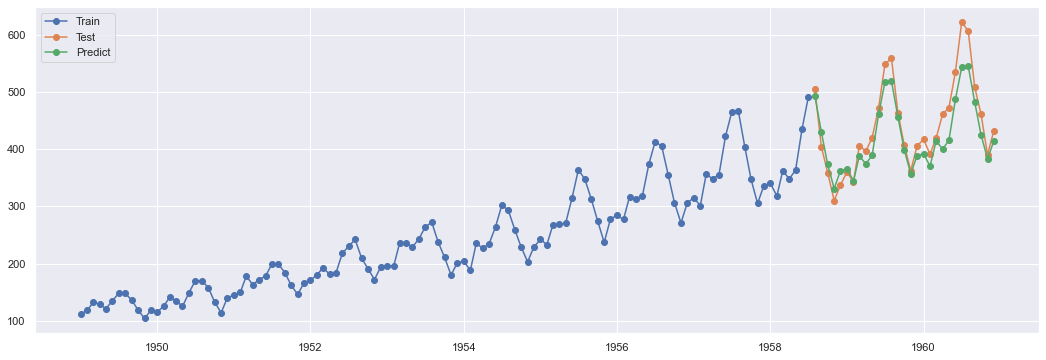

In [23]:
plot(df_predict_best_sarima["predicted_mean"])

### 1.4 例 (pmdarima による自動 SARIMAX 構築)

　`statsmodels` において `statsmodels.tsa.statespace.sarimax.SARIMAX` を用いて次数を自動選定しモデリングする場合, [`pmdarima`](https://alkaline-ml.com/pmdarima/index.html) が便利である. `statsmodels.tsa.statespace.sarimax.SARIMAX` をラップしたモジュールであるが

- 情報量基準をもとにした次数の最適化
- [`scikit-learn`](https://scikit-learn.org/stable/) のモジュールが使えるように [`scikit-learn` 準拠モデル](https://scikit-learn.org/stable/developers/develop.html#apis-of-scikit-learn-objects)として定義

という特徴があるので, `statsmodels.tsa.statespace.sarimax.SARIMAX` の代わりに `pmdarima` で試してみる.

#### 関連モジュール説明

##### [pmdarima.arima.auto_arima](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html#pmdarima.arima.auto_arima)
- ${\rm SARIMAX}(p,d,q)\times(P,D,Q,s)$ を情報量基準をもとに最適な次数を選択し学習まで行うメソッド.

##### [pmdarima.arima.ARIMA](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ARIMA.html#)
- `statsmodels.tsa.statespace.sarimax.SARIMAX` のラップクラス.

##### [pmdarima.arima.ARIMA.predict](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ARIMA.html#pmdarima.arima.ARIMA.predict)
- Out-of-sample forecast のためのメソッド.

##### [pmdarima.arima.ARIMA.predict_in_sample](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ARIMA.html#pmdarima.arima.ARIMA.predict_in_sample)
- In-sample predict のためのメソッド.

#### 具体例

In [24]:
import pmdarima as pm

model_pmdarima = pm.auto_arima(
    psgr_train, seasonal=True, m=12, error_action="ignore", trace=True
)
model_pmdarima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=757.714, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=755.750, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=756.380, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=755.499, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=755.982, Time=0.13 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=757.649, Time=0.20 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=756.771, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=756.022, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=756.011, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=757.976, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=757.438, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.391 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -375.750
Date:                            Sun, 21 Aug 2022   AIC                            755.499
Time:                                    01:20:59   BIC                            760.749
Sample:                                         0   HQIC                           757.625
                                            - 115                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2048      0.090     -2.271      0.023      -0.382      -0.028
sigma2        92.6974     13.326      6.956      0.000      66.579     118.816
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.44
Prob(Q):                              0.87   Prob(JB):                         0.30
Heteroskedasticity (H):               0.96   Skew:                             0.37
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
def predict_pmdarima(model_result, test_data, alpha=None):
    """予測値データフレームを返す.
    引数の test_data をもとに予測期間を決め, 予測値・信頼区間を返す.
    
    Parameters
    ----------
    model_result : 
        statsmodels の fit() 結果インスタンス.
    test_data : pandas.core.Dataframe
        検証データ.
    alpha : float, default None
        信頼区間の確率.
        
    Return
    ------
    df_predict : pandas.core.DataFrame
        予測データフレーム.
    mape : float
        MAPE.
    
    """
    # 予測期間を検証データから取得.
    n_periods = test_data.shape[0]

    # 予測結果インスタンスを取得.
    if alpha:
        predicted_mean, predicted_ci = model_result.predict(
            n_periods=n_periods, return_conf_int=True, alpha=alpha
        )
    else:
        predicted_mean = model_result.predict(n_periods=n_periods)

    # 予測値データフレームを作成 (検証値, 予測値).
    df_predict = pd.DataFrame(
        predicted_mean, columns=["predicted_mean"], index=test_data.index
    )
    df_predict = test_data.copy().join(df_predict)

    if alpha:
        df_predict_ci = pd.DataFrame(
            predicted_ci, columns=["lower", "upper"], index=test_data.index
        )
        df_predict = df_predict.join(df_predict_ci)

    # scikit-learn のモジュールを用いて MAPE を計算.
    mape = mean_absolute_percentage_error(test_data, predicted_mean)

    return df_predict, mape

In [26]:
df_predict_pmdarima, mape_pmdarima = predict_pmdarima(model_pmdarima, psgr_test)
mape_pmdarima_msg = f"MAPE: {round(mape_pmdarima, 3)}"
print(mape_pmdarima_msg)

MAPE: 0.061


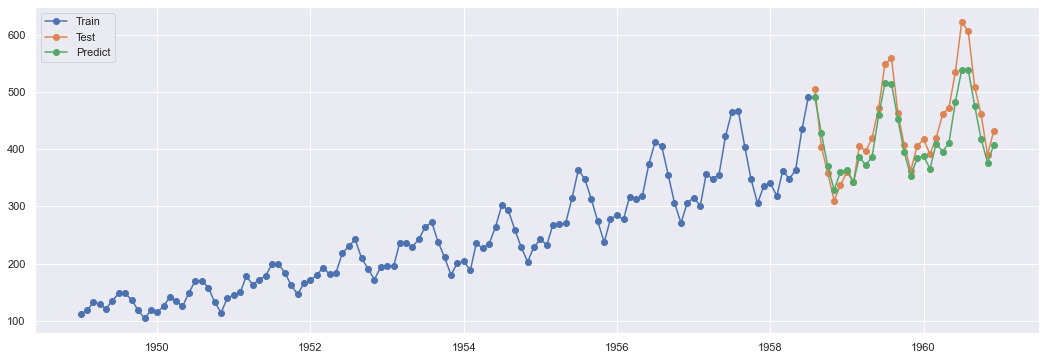

In [27]:
plot(df_predict_pmdarima["predicted_mean"])

### 1.5 例 (sandbox の SARIMAXModel)

　`sandbox` で作成した `SARIMAXModel` でも構築してみる. 内部は `pmdarima` によって自動で次数選定している.

In [28]:
from sandbox.tsa.sarimax import SARIMAXModel

sarimax = SARIMAXModel(trend="c", s=12, trace=True)
sarimax.fit(psgr_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=759.772, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=757.666, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=758.296, Time=0.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=757.438, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=757.897, Time=0.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=759.568, Time=0.33 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=758.709, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=757.961, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=757.951, Time=0.03 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=759.915, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=757.438, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12] intercept
Total fit time: 2.231 seconds


SARIMAXModel(s=12, trace=True, trend='c')

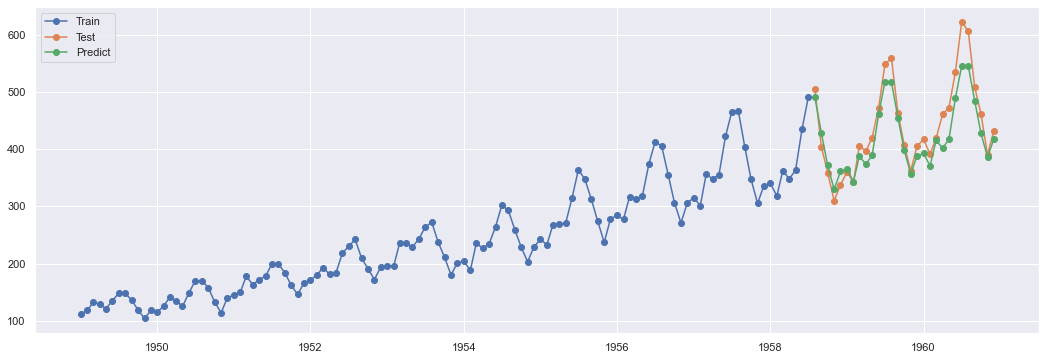

In [30]:
# 予測
pred = sarimax.predict(psgr_test.index, is_pandas=True)

# プロット
plot(pred)

In [31]:
mape = 1 - sarimax.score(psgr_test.index, psgr_test, scorer="mape")
mape_msg = f"MAPE: {round(mape, 3)}"
print(mape_msg)

MAPE: 0.053
